In [1]:
import dabl
import pandas as pd
data = pd.read_csv('../data/interim/dabl_test.csv')
data_clean = dabl.clean(data)

In [2]:
data_clean

,group,winner,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,weight_class
0,4,Blue,0,0,1,-6,-6,-31,-1,-4,-3,0.00,5.08,-4,1.980000,-0.400000,0.750000,Light Heavyweight
1,4,Blue,-3,2,2,-3,-7,-30,-6,-7,1,10.16,15.24,-5,0.380000,0.300000,1.840000,Welterweight
2,4,Blue,1,-1,-1,0,1,2,0,-1,0,-5.08,-15.24,-3,0.760000,0.600000,0.190000,Flyweight
3,0,Red,-1,0,-4,-14,-8,-48,-1,-5,-3,10.16,5.08,-7,6.920000,-1.000000,-1.630000,Featherweight
4,3,Blue,-1,0,-1,-1,-2,-6,0,-1,0,2.54,0.00,-3,0.580000,-0.600000,0.230000,Middleweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,2,Blue,1,0,-2,-2,1,-5,0,-1,0,0.00,2.54,6,-13.666667,0.000000,0.000000,Lightweight
4068,1,Red,0,-3,-3,-3,0,-9,0,-1,0,7.62,7.62,-2,-18.000000,-1.000000,-4.666667,Welterweight
4069,1,Red,0,0,0,0,0,0,-1,0,0,-2.54,-2.12,0,-4.000000,1.000000,1.000000,Heavyweight
4070,0,Red,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.500000,0.000000,-3.500000,Welterweight


In [3]:
types = dabl.detect_types(data_clean)

<AxesSubplot:>

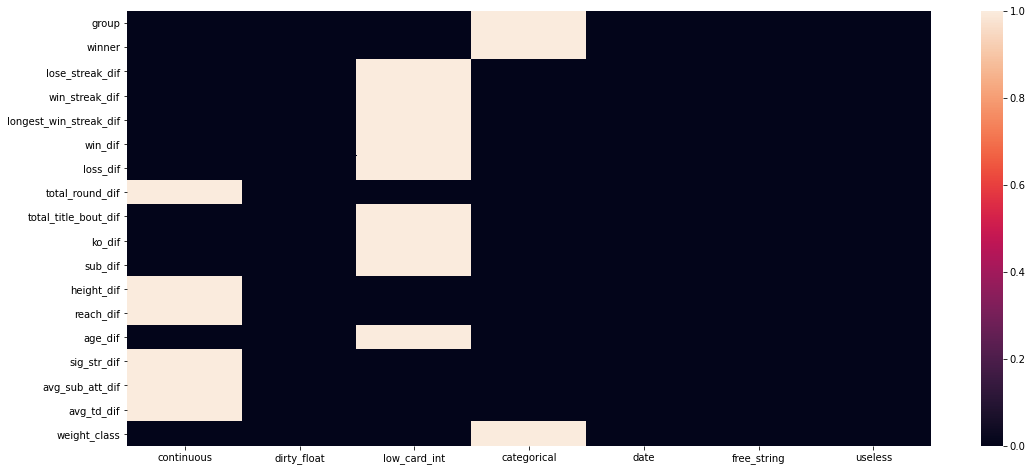

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))
sns.heatmap(types)

Target looks like classification


C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 2 outliers in column win_streak_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 2 outliers in column loss_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 6 outliers in column avg_td_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 1 outliers in column sig_str_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 4 outliers in column longest_win_streak_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-p

Linear Discriminant Analysis training set score: 0.565


C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[[<Figure size 1440x432 with 15 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

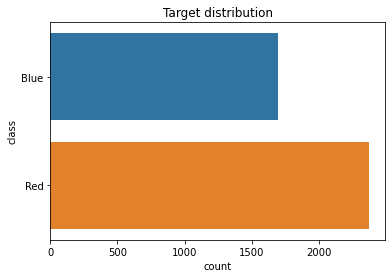

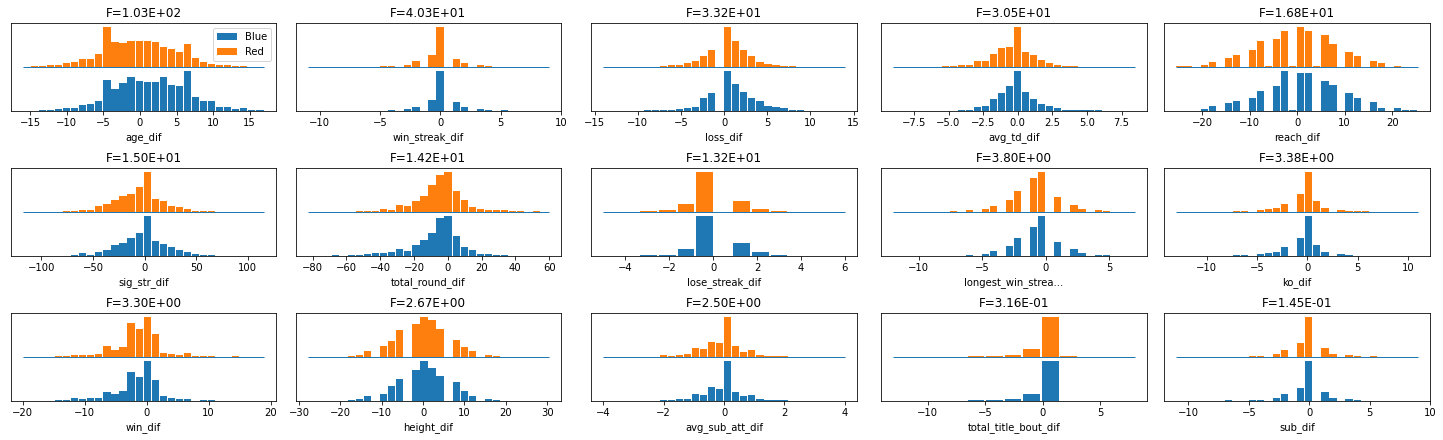

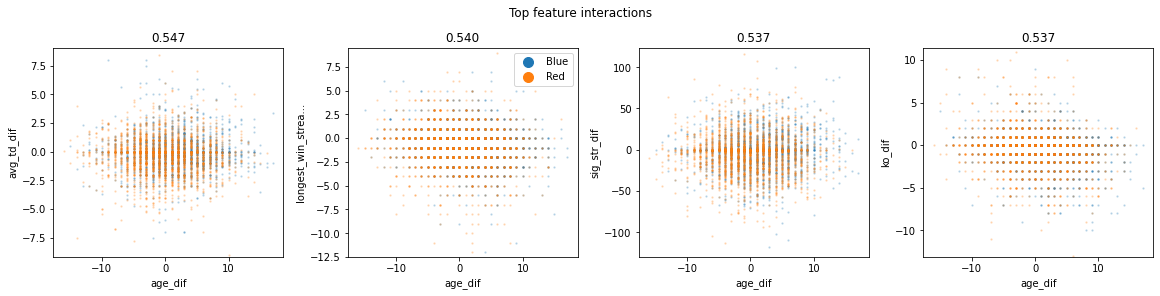

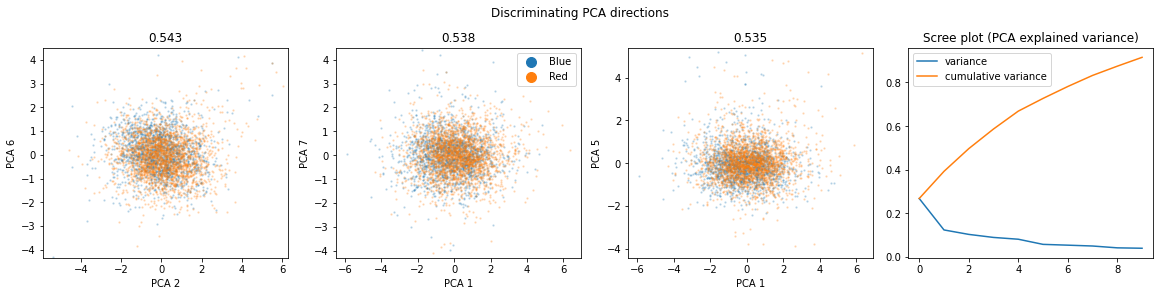

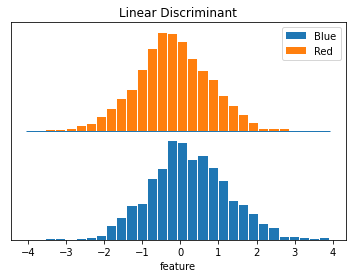

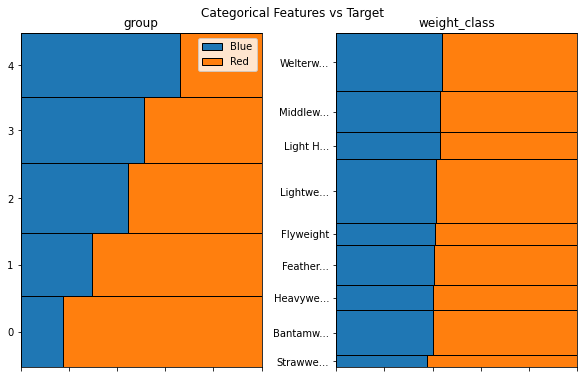

In [5]:
dabl.plot(data_clean, target_col='winner')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data_clean.drop('winner', axis=1)
y = data_clean.winner

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
sc = dabl.SimpleClassifier(random_state=0).fit(X_train, y_train)

Running DummyClassifier()
accuracy: 0.583 average_precision: 0.417 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.368
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.583 average_precision: 0.417 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.368

Running GaussianNB()
accuracy: 0.432 average_precision: 0.420 roc_auc: 0.590 recall_macro: 0.508 f1_macro: 0.339
=== new best GaussianNB() (using recall_macro):
accuracy: 0.432 average_precision: 0.420 roc_auc: 0.590 recall_macro: 0.508 f1_macro: 0.339

Running MultinomialNB()
accuracy: 0.628 average_precision: 0.568 roc_auc: 0.665 recall_macro: 0.614 f1_macro: 0.614
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.628 average_precision: 0.568 roc_auc: 0.665 recall_macro: 0.614 f1_macro: 0.614

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.559 average_precision: 0.479 roc_auc: 0.609 recall_macro: 0.609 f1_macro: 0.541
Running DecisionTreeClassifier(class_weight='balanced', max_d

              precision    recall  f1-score   support

        Blue       0.53      0.77      0.63       556
         Red       0.76      0.52      0.62       788

    accuracy                           0.62      1344
   macro avg       0.65      0.64      0.62      1344
weighted avg       0.67      0.62      0.62      1344

[[427 129]
 [377 411]]
Depth: 2
Number of leaves: 3
Computing partial dependence plots...


C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\dabl\plot\utils.py:378: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:735: UserWarning: Attempting to set identical bottom == top == 0.5072709221056055 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:735: UserWarning: Attempting to set identical bottom == top == 0.5072709221056055 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:735: UserWarning: Attempting to set identical bottom == top == 0.5072709221056055 results in singular transformations; automatically expanding.
  ax.set_yli

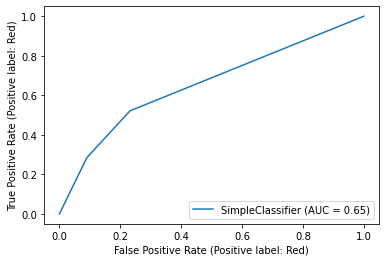

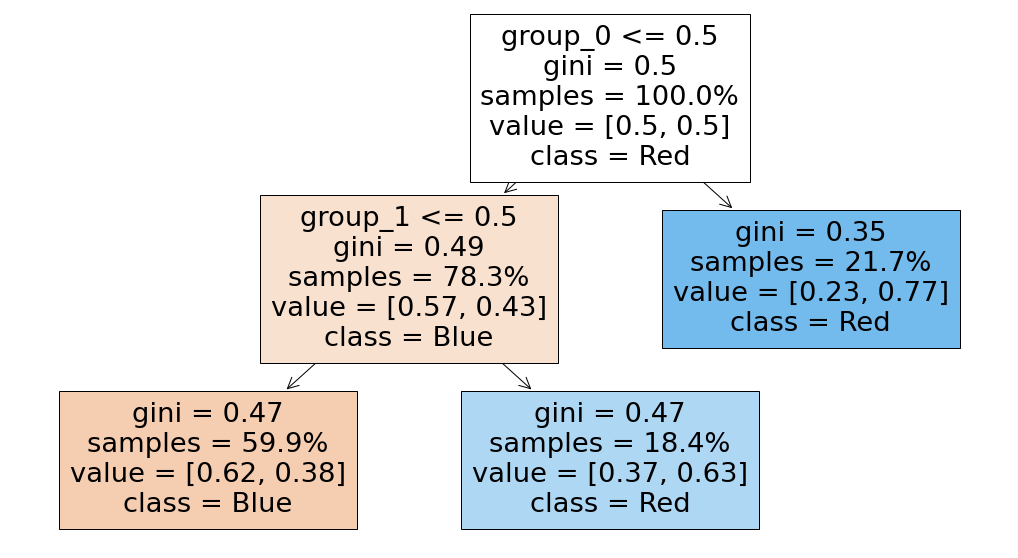

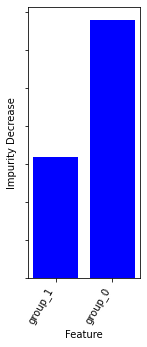

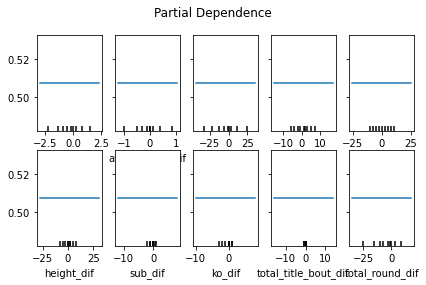

In [12]:
dabl.explain(sc, X_test, y_test) 
plt.tight_layout()

In [13]:
ac = dabl.AnyClassifier().fit(X_train, y_train)

C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jpzam\miniconda3\envs\ufc_bets\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

best classifier:  SVC(C=1)
best score: 0.607


              precision    recall  f1-score   support

        Blue       0.58      0.46      0.51       556
         Red       0.67      0.76      0.71       788

    accuracy                           0.64      1344
   macro avg       0.62      0.61      0.61      1344
weighted avg       0.63      0.64      0.63      1344

[[257 299]
 [187 601]]
Computing partial dependence plots...


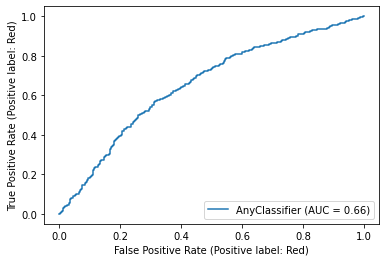

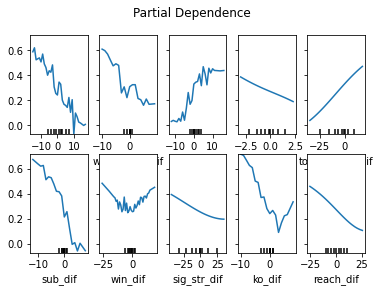

In [14]:
dabl.explain(ac, X_test, y_test)